In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
from pyproj import Proj, transform
import os

import rasterio
from rasterio.plot import show
import xarray as xr
import rioxarray


First check that the bounding box is over the catchment in question.

In [3]:
# Set up working directory
workspace = os.path.dirname(os.getcwd()) # current folder

# Load shapefile
shapefile_path = "%s/data/huc10/centroid_bounding_box.shp" % workspace
bbox_gdf = gpd.read_file(shapefile_path)
print(bbox_gdf)

# Load  shapefile
boundary_path = "%s/data/huc10/HGAC_HUC_10_Watersheds/HGAC_HUC_10_Watersheds.shp" % workspace
boundary_gdf = gpd.read_file(boundary_path)

# Reproject the watersheds to WGS84
boundary_wgs84 = boundary_gdf.to_crs(4326)

# # Save the reprojected watersheds
# wgs84_watersheds_path = "%s/data//huc10/watersheds_WGS84.shp" % workspace
# boundary_wgs84.to_file(wgs84_watersheds_path)

# # Create a figure and axes
# fig, ax = plt.subplots(figsize=(10, 8))

# # Plot boundary
# boundary_wgs84.plot(ax=ax, color='blue', linewidth=0.5)

# # Plot the bounding box
# bbox_gdf.plot(ax=ax, color='red', linewidth=2, alpha=0.5)

# # Set the title and axis labels
# ax.set_title("Bounding Box on Houston Watersheds")
# ax.set_xlabel("Longitude")
# ax.set_ylabel("Latitude")

# # # Adjust the plot limits if needed
# # ax.set_xlim(min_lon - 0.5, max_lon + 0.5)
# # ax.set_ylim(min_lat - 0.5, max_lat + 0.5)

# # Show the plot
# plt.show()

   FID                                           geometry
0    0  POLYGON ((-95.21039 29.50759, -96.21039 29.507...


We have a bounding box in WGS84 coordinates that has the watershed inside. The next thing to do is check the DEM.

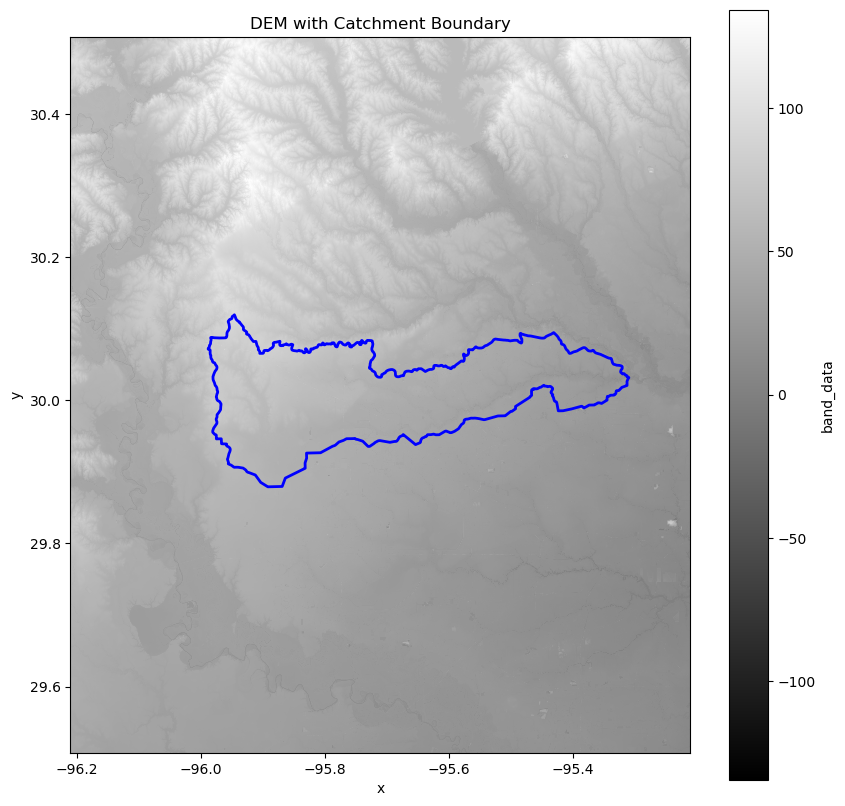

[[[40.597706 40.627804 40.775723 ...  8.616982  8.700342  8.982395]
  [40.49989  40.57465  40.615074 ...  9.137085  9.121888  8.991078]
  [40.452682 39.780754 40.033413 ...  8.996215  8.771674  8.665131]
  ...
  [62.747375 63.557697 64.84579  ... 87.9795   86.68394  85.82552 ]
  [62.053177 62.73761  63.848667 ... 86.917915 85.82246  84.86807 ]
  [61.56716  62.22484  63.33676  ... 86.20885  84.78106  83.739716]]]


In [4]:
# Paths
dem_path = f"{workspace}/data/dem/resampled_USGS_30m_DEM.tif"
watershed_shapefile_path = f"{workspace}/data/huc10/cypress_creek_watershed.shp"

# Open the DEM using xarray
dem = xr.open_dataarray(dem_path)

# Plot DEM with watershed boundary
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the DEM
dem.plot(ax=ax, cmap='gray')  # xarray's plot function works similar to matplotlib

# Load watershed shapefile using geopandas
gdf = gpd.read_file(watershed_shapefile_path)

# Plot the boundary
gdf.boundary.plot(ax=ax, color='blue', linewidth=2)

plt.title("DEM with Catchment Boundary")
plt.show()

# Access the DEM data as a NumPy array
dem_raster = dem.values

# Print the DEM raster data
print(dem_raster)


Continuing with the static data, get Polaris


In [ ]:
# Paths
polaris_path = f"{workspace}/data/polaris/processed/combined_polaris_data.nc"
watershed_shapefile_path = f"{workspace}/data/huc10/cypress_creek_watershed.shp"
bbox_shapefile_path = f"{workspace}/data/huc10/centroid_bounding_box.shp"

polaris = xr.open_dataset(polaris_path)

# fig, ax = plt.subplots(figsize=(10, 10))

# polaris.sel(band=1).plot(ax=ax, cmap='gray')  

# # Plot the catchment boundary
# gdf.boundary.plot(ax=ax, color="blue", linewidth=2)
# bbox_gdf.boundary.plot(ax=ax, color="yellow", linewidth=2)

# plt.title("Polaris data with Catchment Boundary")
# plt.show()

# # Access the raster data as a NumPy array
# polaris_raster = polaris.values

# print(polaris_raster)

Downloaded NLCD by modifying an existing script from the LandCoverDownloader Github.

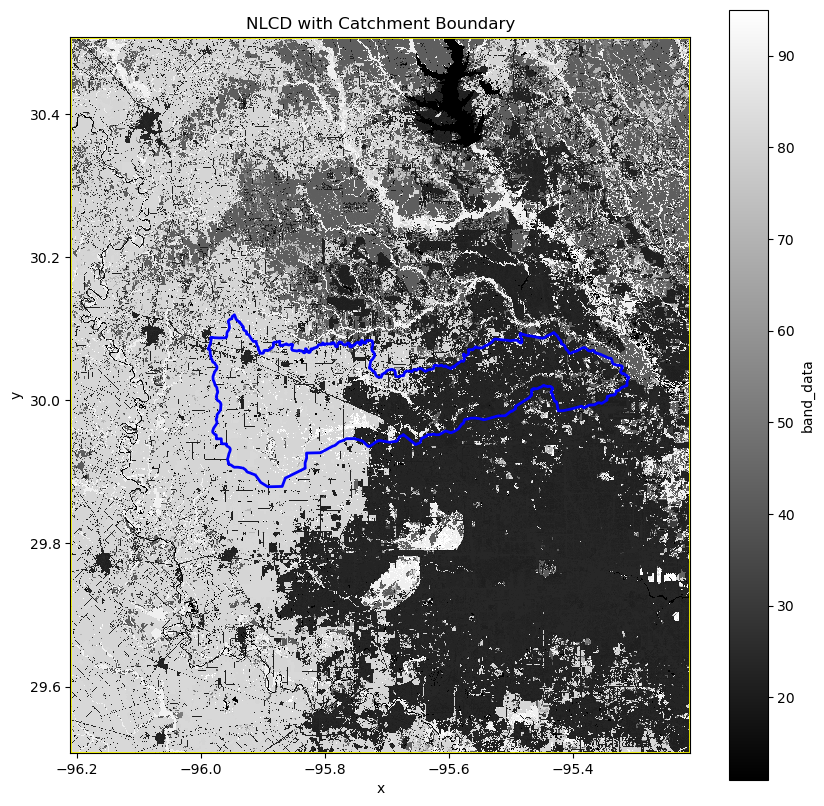

In [ ]:
nlcd_path = f"{workspace}/data/nlcd/resampled_nlcd_2016.tif"

# Open NLCD using xarray and rioxarray
nlcd = xr.open_dataarray(nlcd_path)

# Plot NLCD land cover data with watershed and bbox boundaries
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the NLCD data
nlcd.plot(ax=ax, cmap='gray')  # Plot NLCD data as a grayscale raster

# Load watershed shapefile
gdf = gpd.read_file(watershed_shapefile_path)

# Plot the catchment boundary
gdf.boundary.plot(ax=ax, color="blue", linewidth=2)

# Load bbox shapefile and plot it
bbox_gdf = gpd.read_file(bbox_shapefile_path)
bbox_gdf.boundary.plot(ax=ax, color="yellow", linewidth=2)

plt.title("NLCD with Catchment Boundary")
plt.show()


Take a look at SMAP data so we can organize it.

An error occurred: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).


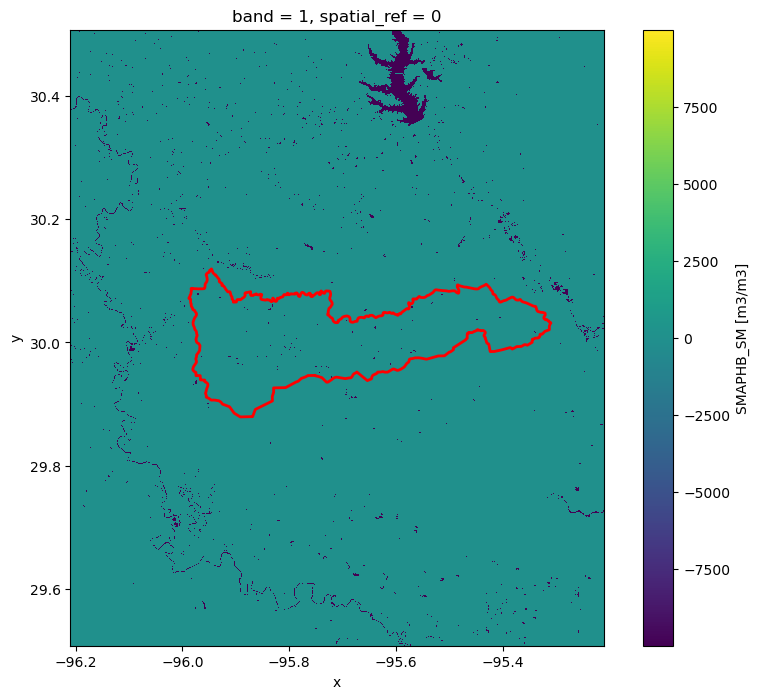

In [ ]:
smap_ex_fp = f'{workspace}/data/daily/2015-04-06/SMAPHB_SM_2015-04-06.nc'

try:
    # Open the SMAP dataset
    smaphb_sample = rioxarray.open_rasterio(smap_ex_fp)

    # Load the watershed shapefile for boundary plotting
    gdf = gpd.read_file(watershed_shapefile_path)

    # Create a figure and axes for plotting
    fig, ax = plt.subplots(figsize=(10, 8))

    # Plot the soil moisture grid
    smaphb_sample.isel(band=0).plot.imshow(ax=ax, cmap='viridis')

    # Plot the watershed boundary
    gdf.boundary.plot(ax=ax, color='red', linewidth=2)

    # Set the colorbar label
    plt.colorbar(label="m³/m³")

    # Set the title and axis labels
    plt.title('Soil Moisture Grid with Watershed Boundary')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    # Show the plot
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
smaphb_sample

<xarray.DataArray 'SMAPHB_SM' (band: 1, y: 3600, x: 3600)> Size: 52MB
[12960000 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 29kB -96.21 -96.21 -96.21 ... -95.21 -95.21 -95.21
  * y            (y) float64 29kB 30.51 30.51 30.51 30.51 ... 29.51 29.51 29.51
    spatial_ref  int64 8B 0
Attributes:
    lat#_FillValue:  nan
    lon#_FillValue:  nan
    citation:        Vergopolan et al. (2021). SMAP-HydroBlocks, a 30-m satel...
    creator_name:    Noemi Vergopolan (noemi@princeton.edu)
    description:     SMAP-HydroBlocks (SMAP-HB) is a 30-m hyper-resolution sa...
    institution:     Princeton University
    title:           SMAP-HydroBlocks Surface Soil Moisture Data (m3/m3)
    unit:            m3/m3
    coordinates:     time
    _FillValue:      -9999.0
    scale_factor:    1.0
    add_offset:      0.0

In [ ]:
unprocessed_smap_ex_fp = f"{workspace}/data/smaphb/SMAPHB_sample/SMAP-HB_surface-soil-moisture_30m_daily_2015-09.nc"
unprocessed_smaphb_sample = rioxarray.open_rasterio(unprocessed_smap_ex_fp)
unprocessed_smaphb_sample

<xarray.DataArray 'SMAPHB_SM' (time: 30, y: 3600, x: 3600)> Size: 2GB
[388800000 values with dtype=float32]
Coordinates:
  * x            (x) float64 29kB -96.21 -96.21 -96.21 ... -95.21 -95.21 -95.21
  * y            (y) float64 29kB 30.51 30.51 30.51 30.51 ... 29.51 29.51 29.51
  * time         (time) object 240B 2015-09-01 00:00:00 ... 2015-09-30 00:00:00
    spatial_ref  int64 8B 0
Attributes: (12/14)
    lat#_FillValue:          nan
    lon#_FillValue:          nan
    citation:                Vergopolan et al. (2021). SMAP-HydroBlocks, a 30...
    creator_name:            Noemi Vergopolan (noemi@princeton.edu)
    description:             SMAP-HydroBlocks (SMAP-HB) is a 30-m hyper-resol...
    institution:             Princeton University
    ...                      ...
    NETCDF_DIM_EXTRA:        {time}
    NETCDF_DIM_time_DEF:     [30.  4.]
    NETCDF_DIM_time_VALUES:  [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11....
    _FillValue:              -9999.0
    scale_factor:            1.0
    add_offset:              0.0

<xarray.DataArray 'SMAPHB_SM' (time: 31, lat: 20, lon: 20)> Size: 50kB
[12400 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 160B 29.53 29.58 29.63 29.68 ... 30.38 30.43 30.48
  * lon      (lon) float64 160B -96.19 -96.14 -96.09 ... -95.34 -95.29 -95.24
  * time     (time) datetime64[ns] 248B 2016-01-01 2016-01-02 ... 2016-01-31
[[[       nan        nan        nan ...        nan        nan        nan]
  [       nan        nan        nan ...        nan        nan        nan]
  [       nan        nan        nan ...        nan        nan        nan]
  ...
  [0.35986927 0.3613914  0.21885382 ...        nan        nan        nan]
  [0.3282485  0.3743773  0.36004344 ...        nan        nan        nan]
  [0.30813232 0.36854067 0.2686106  ...        nan        nan        nan]]

 [[0.28026155 0.2959884  0.2894146  ... 0.23184988 0.2280055  0.2156689 ]
  [0.28111953 0.29715276 0.33989266 ... 0.24581182 0.22862422 0.22751799]
  [0.2864267  0.2881716  0.33357647 ... 0.2269907

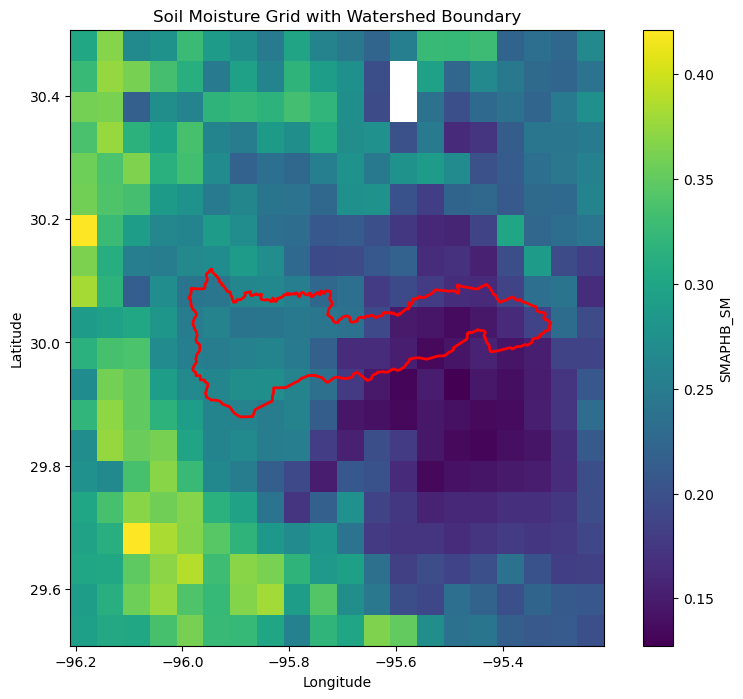

In [ ]:
smap_ex_upscaled_fp = f"{workspace}/data/smaphb/SMAP_sample_5km_v2/SMAP-HB_surface-soil-moisture_5000m_daily_2016-01.nc"

smaphb_sample_5km = xr.open_dataarray(smap_ex_upscaled_fp)

print(smaphb_sample_5km)
# Print the DataArray to check
print(smaphb_sample_5km.data)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the soil moisture grid
plot = smaphb_sample_5km.isel(time=2).plot.imshow(ax=ax, cmap='viridis')

# Plot the watershed boundary
gdf.boundary.plot(ax=ax, color='red', linewidth=2)

# Set the title and axis labels
plt.title('Soil Moisture Grid with Watershed Boundary')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


<xarray.DataArray 'SMAPHB_SM' (lat: 2, lon: 2)> Size: 16B
[4 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 16B 29.76 30.26
  * lon      (lon) float64 16B -95.96 -95.46
    time     datetime64[ns] 8B ...
[[0.290625   0.20614363]
 [0.31488487 0.28335372]]


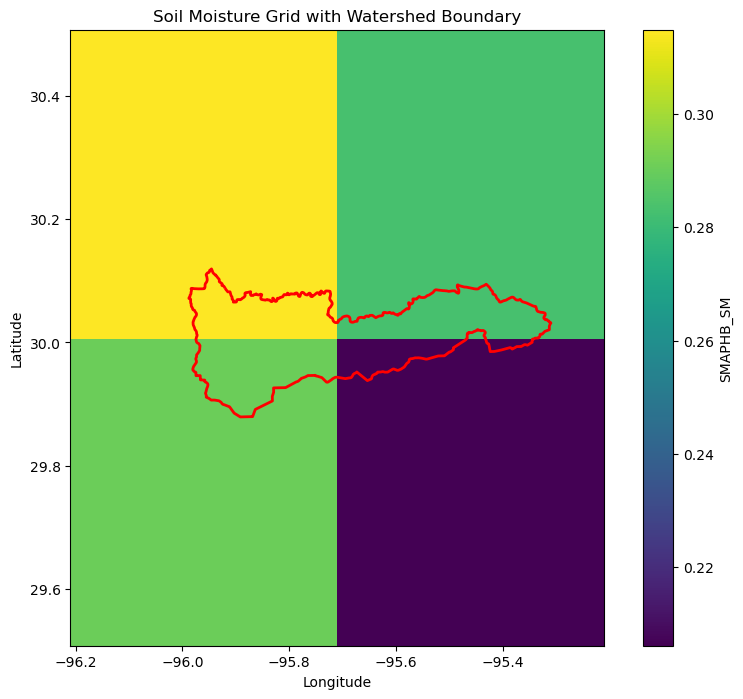

In [ ]:
smap_ex_upscaled_fp = f"{workspace}/data/daily/2019-10-29/SMAPHB_SM_2019-10-29_50km.nc"

smaphb_sample_50km = xr.open_dataarray(smap_ex_upscaled_fp)

print(smaphb_sample_50km)
# Print the DataArray to check
print(smaphb_sample_50km.data)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the soil moisture grid
plot = smaphb_sample_50km.plot.imshow(ax=ax, cmap='viridis')

# Plot the watershed boundary
gdf.boundary.plot(ax=ax, color='red', linewidth=2)

# Set the title and axis labels
plt.title('Soil Moisture Grid with Watershed Boundary')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

In [ ]:
# set crs
smaphb_sample = smaphb_sample.rio.write_crs("EPSG:4326")

Take a look at IMERG data.

<xarray.DataArray 'precipitation' (lon: 10, lat: 10)> Size: 400B
[100 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 40B -96.15 -96.05 -95.95 ... -95.45 -95.35 -95.25
  * lat      (lat) float64 80B 29.55 29.65 29.75 29.85 ... 30.25 30.35 30.45
    time     datetime64[ns] 8B 2015-04-13
Attributes:
    units:      mm/day
    long_name:  Daily mean precipitation rate (combined microwave-IR) estimat...


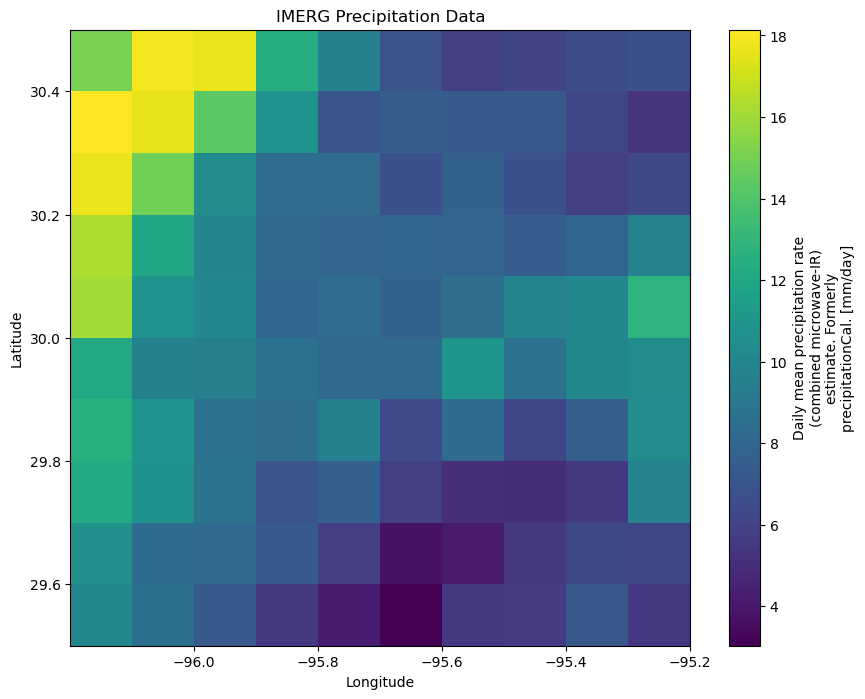

In [ ]:
# Load the NetCDF file
imerg_ds = xr.open_dataset(f'{workspace}/data/daily/2015-04-13/cropped_3B-DAY.MS.MRG.20150413-S000000-E235959.V07B.nc4') 

precip = imerg_ds["precipitation"].isel(time=0)

print(precip)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Plot latitude vs longitude
precip.plot(x='lon', y='lat', ax=ax, cmap='viridis')

# Set the title and axis labels
plt.title('IMERG Precipitation Data')
plt.ylabel('Latitude')
plt.xlabel('Longitude')

# Show the plot
plt.show()

In [ ]:

print("POLARIS: ", polaris["ksat_0_5"].shape)
print("DEM: ", dem.shape) # good, should be 3600 x 3600 if 30 m res (111000 m / 30 m = 3700)
print("NLCD: ", nlcd.shape)

POLARIS:  (3600, 3600)
DEM:  (1, 3600, 3600)
NLCD:  (1, 3600, 3600)


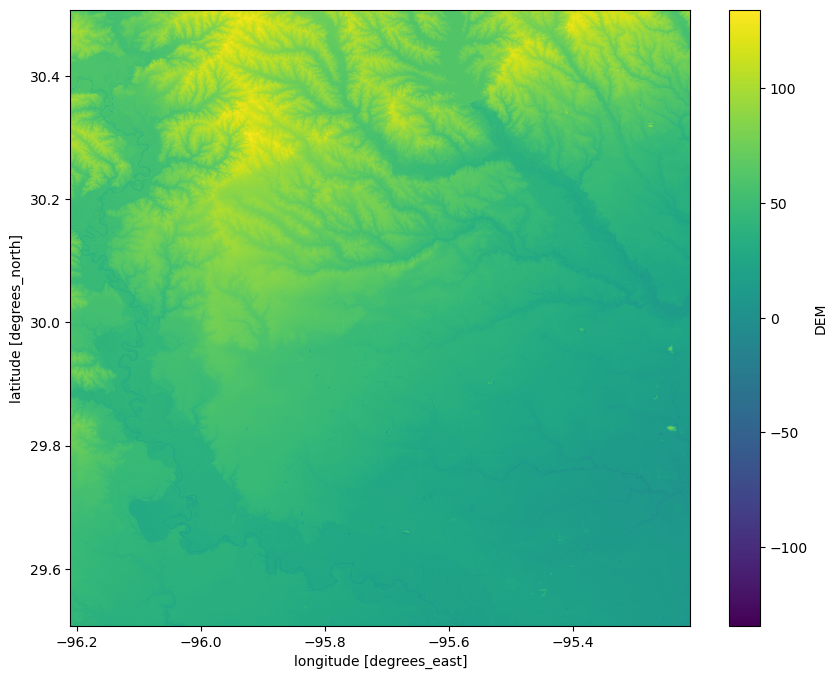

In [ ]:
# look at the combined static dataset
combined_data = xr.open_dataset(f"{workspace}/data/combined_output/combined_dem_nlcd_polaris_data.nc")

fig, ax = plt.subplots(figsize=(10, 8))
combined_data["DEM"].plot.imshow(ax=ax, cmap='viridis')

plt.show()


## To do

- Reproject SMAP data
- Delete date folders for which the data aren't complete
    - 80% valid points
    - Do the same thing for precipitation data
    - Only keep folders where you have both - so do SM first and then just check those dates for precip
- Try to open Polaris data with xarray to crop instead of rasterio to fix inconsistent dimensions
    - Had been using Rasterio because it's a tiff instead of netcdf
- Match 0.1-deg resolution IMERG to other files
    - Leave it be for now; may need to downscale to 4 km later
    - Should be fine to have non-matching degrees with cLSTMs
- Use True's suggested API to get MRMS rainfall for 2019/10 event

## Fix map layers

- Error: shapefile doesn't exist
    - I have my own, so try substitiuting that in

- HEC-RAS model - get the model to work



<xarray.DataArray 'band_data' (band: 1, y: 7200, x: 7200)> Size: 207MB
[51840000 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 58kB -97.0 -97.0 -97.0 -97.0 ... -95.0 -95.0 -95.0
  * y            (y) float64 58kB 29.0 29.0 29.0 29.0 ... 31.0 31.0 31.0 31.0
    spatial_ref  int64 8B ...
Attributes:
    AREA_OR_POINT:  Area


Text(156.371538366401, 0.5, 'Latitude')

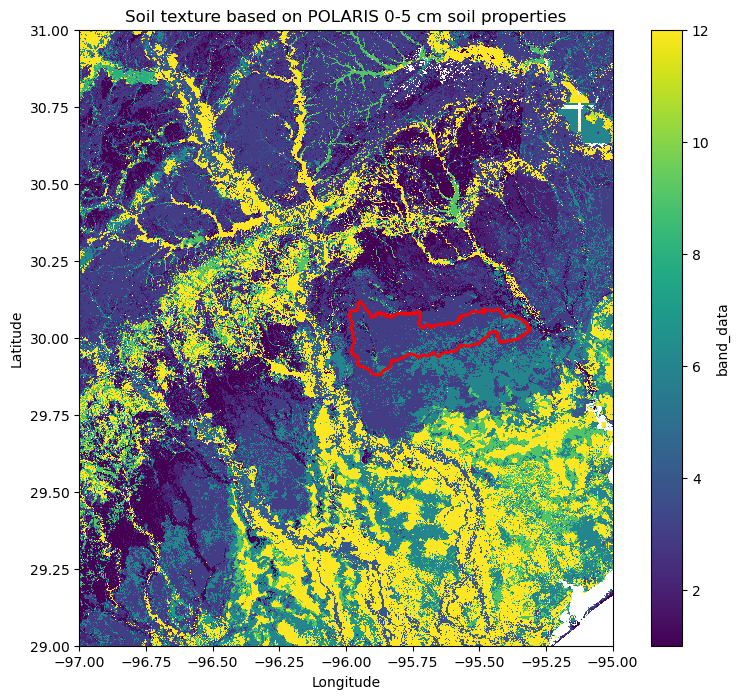

In [ ]:
soil_texture = xr.open_dataarray(f"{workspace}/data/polaris/processed/soil_textures.tif")
print(soil_texture)

soil_texture_masked = soil_texture.where(soil_texture != -9999)

fig, ax = plt.subplots(figsize=(10, 8))
soil_texture_masked.isel(band=0).plot.imshow(ax=ax, cmap='viridis')

gdf.boundary.plot(ax=ax, color='red', linewidth=2)
# Set the title and axis labels
plt.title('Soil texture based on POLARIS 0-5 cm soil properties')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# 'sand':1,
# 'loamy_sand':2,
# 'sandy_loam':3,
# 'silt_loam':4,
# 'silt':5,
# 'loam':6,
# 'sandy_clay_loam':7,
# 'silty_clay_loam':8,
# 'clay_loam':9,
# 'sandy_clay':10,
# 'silty_clay':11,
# 'clay':12

<xarray.DataArray 'unknown' (latitude: 3500, longitude: 7000)> Size: 98MB
[24500000 values with dtype=float32]
Coordinates:
    time            datetime64[ns] 8B ...
    step            timedelta64[ns] 8B ...
    heightAboveSea  float64 8B ...
  * latitude        (latitude) float64 28kB 54.99 54.98 54.98 ... 20.02 20.01
    valid_time      datetime64[ns] 8B ...
  * longitude       (longitude) float64 56kB -130.0 -130.0 ... -60.02 -60.01
Attributes: (12/30)
    GRIB_paramId:                             0
    GRIB_dataType:                            ra
    GRIB_numberOfPoints:                      24500000
    GRIB_typeOfLevel:                         heightAboveSea
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_name:                                unknown
    GRIB_shortName:                           unknown
    GRIB_units:                               unknown
    long_nam

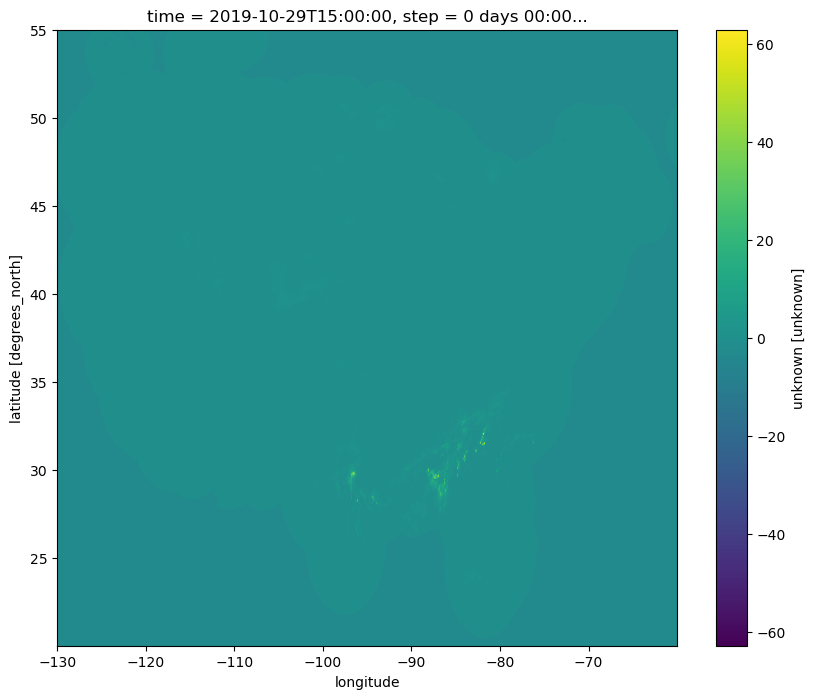

In [ ]:
mrms_ex = xr.open_dataarray(f"{workspace}/data/mrms/netcdf/GaugeCorr_QPE_01H_00.00_20191029-150000.nc")
print(mrms_ex)


fig, ax = plt.subplots(figsize=(10, 8))
mrms_ex.plot.imshow(ax=ax, cmap='viridis')

# gdf.boundary.plot(ax=ax, color='red', linewidth=2)

<xarray.DataArray 'SMAPHB_SM' (band: 1, y: 3600, x: 3600)> Size: 52MB
[12960000 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 29kB -96.21 -96.21 -96.21 ... -95.21 -95.21 -95.21
  * y            (y) float64 29kB 30.51 30.51 30.51 30.51 ... 29.51 29.51 29.51
    spatial_ref  int64 8B 0
Attributes:
    lat#_FillValue:  nan
    lon#_FillValue:  nan
    citation:        Vergopolan et al. (2021). SMAP-HydroBlocks, a 30-m satel...
    creator_name:    Noemi Vergopolan (noemi@princeton.edu)
    description:     SMAP-HydroBlocks (SMAP-HB) is a 30-m hyper-resolution sa...
    institution:     Princeton University
    title:           SMAP-HydroBlocks Surface Soil Moisture Data (m3/m3)
    unit:            m3/m3
    coordinates:     time
    _FillValue:      -9999.0
    scale_factor:    1.0
    add_offset:      0.0
<xarray.DataArray 'unknown' (latitude: 3500, longitude: 7000)> Size: 98MB
array([[-3., -3., -3., ..., -3., -3., -3.],
       [

<Axes: title={'center': 'step = 0 days 00:00:00, heightAboveSea = 0.0 [1...'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>

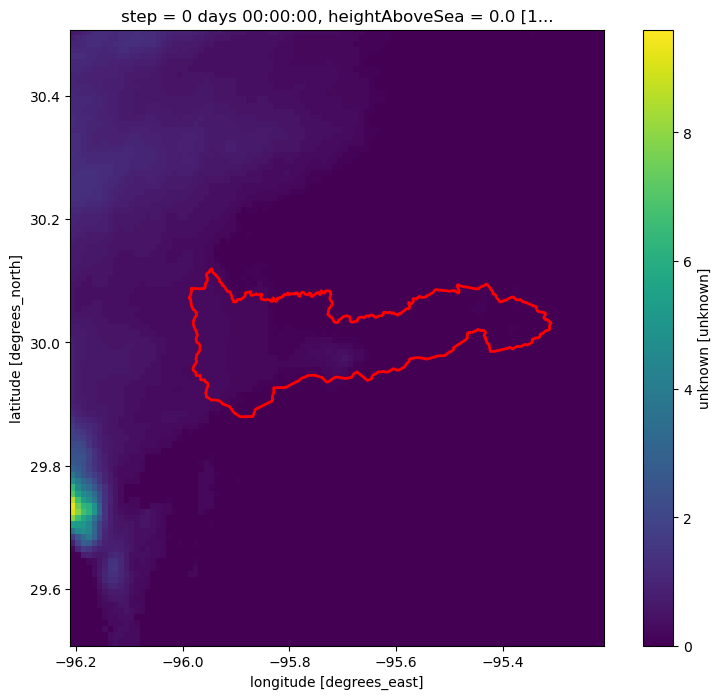

In [ ]:
print(smaphb_sample)
print(mrms_ex)
mrms_ex = mrms_ex.rio.write_crs("EPSG:4326")
# smaphb_sample = smaphb_sample.rio.set_spatial_dims(x_dim='lon', y_dim='lat')
# smaphb_sample = smaphb_sample.rename({'lon': 'longitude', 'lat': 'latitude'})  # Ensure spatial dimensions

# look at the rainfall in the study area
mrms_ex_match = mrms_ex.rio.reproject_match(smaphb_sample)

fig, ax = plt.subplots(figsize=(10, 8))
mrms_ex_match.plot.imshow(ax=ax, cmap='viridis')

gdf.boundary.plot(ax=ax, color='red', linewidth=2)

In [ ]:
print(mrms_ex_match.shape)


(3600, 3600)


In [5]:
# import ICLUS data and try cropping it,
# then crop it properly in a .py

iclus = xr.open_dataarray(f"{workspace}/data/iclus/ICLUS_v2_1_1_land_use_conus_ssp2_rcp45_hadgem2_es/ICLUS_v2_1_1_land_use_conus_2020_ssp2_rcp45_hadgem2_es.tif")
iclus = iclus.rio.write_crs("ESRI:102003")

# with rasterio.open(f"{workspace}/data/iclus/ICLUS_v2_1_1_land_use_conus_ssp2_rcp45_hadgem2_es/ICLUS_v2_1_1_land_use_conus_2020_ssp2_rcp45_hadgem2_es.tif") as iclus:
#     crs = iclus.crs
#     print(crs)
# ESRI:102003


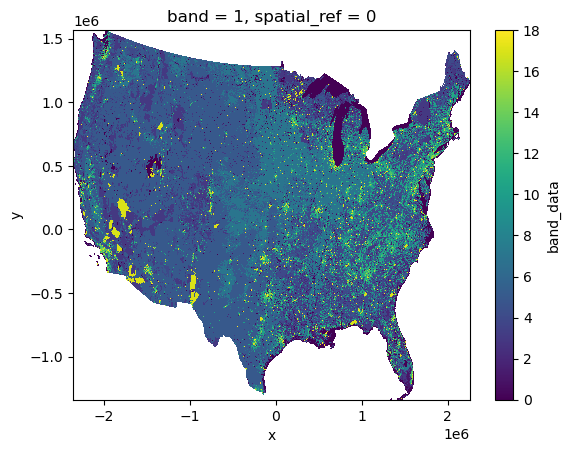

In [ ]:
# iclus.isel(band=0).plot.imshow()

In [12]:
with rasterio.open(f"{workspace}/data/iclus/ICLUS_v2_1_1_land_use_conus_ssp2_rcp45_hadgem2_es/ICLUS_v2_1_1_land_use_conus_2020_ssp2_rcp45_hadgem2_es.tif") as src:
    coord_ref = src.crs

print(coord_ref)
iclus.rio.crs

ESRI:102003


CRS.from_wkt('PROJCS["USA_Contiguous_Albers_Equal_Area_Conic",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",37.5],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["ESRI","102003"]]')

In [30]:
# Load SMAP data to match projection to
smap_raster = xr.open_dataarray(f"{workspace}/data/daily/2015-04-01/SMAPHB_SM_2015-04-01.nc")


smap_raster = smap_raster.rename({'lon': 'x', 'lat': 'y'})  # Ensure spatial dimensions
smap_raster = smap_raster.rio.set_spatial_dims(x_dim='x', y_dim='y')
print(smap_raster)

# In order to make reprojection possible, first clip ICLUS to a more manageable size
buffered_study_area = gpd.read_file(f'{workspace}/data/huc10/centroid_buffered_bounding_box.shp')
print(buffered_study_area.geometry)

<xarray.DataArray 'SMAPHB_SM' (y: 3600, x: 3600)> Size: 52MB
[12960000 values with dtype=float32]
Coordinates:
  * y            (y) float64 29kB 29.51 29.51 29.51 29.51 ... 30.51 30.51 30.51
  * x            (x) float64 29kB -96.21 -96.21 -96.21 ... -95.21 -95.21 -95.21
    time         datetime64[ns] 8B ...
    spatial_ref  int64 8B ...
0    POLYGON ((-95.11039 29.40759, -96.31039 29.407...
Name: geometry, dtype: geometry


In [25]:
# Clip with the GeoDataFrame
try:
    iclus_clipped = iclus.rio.clip(buffered_study_area.geometry.values, crs=buffered_study_area.crs)
except Exception as e:
    print("Clipping failed:", e)

print(iclus_clipped)


<xarray.DataArray 'band_data' (band: 1, y: 1484, x: 1294)> Size: 8MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [ 7.,  7.,  7., ..., nan, nan, nan],
        [ 7.,  7.,  7., ..., nan, nan, nan],
        [ 0.,  7.,  7., ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 10kB -3.006e+04 -2.997e+04 ... 8.622e+04 8.631e+04
  * y            (y) float64 12kB -7.695e+05 -7.696e+05 ... -9.029e+05 -9.03e+05
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:           Area
    RepresentationType:      THEMATIC
    STATISTICS_COVARIANCES:  9.961587164430432
    STATISTICS_MAXIMUM:      18
    STATISTICS_MEAN:         5.5847522981832
    STATISTICS_MINIMUM:      0
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       3.1561982137424


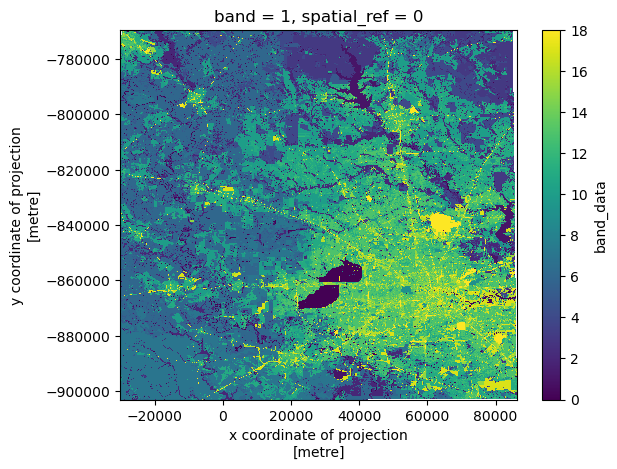

In [27]:
iclus_clipped.isel(band=0).plot.imshow()

In [31]:
# Reproject clipped ICLUS data
iclus_reprojected = iclus_clipped.rio.reproject_match(smap_raster)

# Important preprocessing steps
# Ensure CRS exists and is WGS84

# Ensure that NaNs are set as -9999
iclus_clipped = iclus_clipped.fillna(-9999)
iclus_reprojected = iclus_reprojected.fillna(-9999)

print(iclus_reprojected)

<xarray.DataArray 'band_data' (band: 1, y: 3600, x: 3600)> Size: 52MB
array([[[ 7.,  7.,  7., ..., 13., 13., 12.],
        [ 7.,  7.,  7., ..., 13., 13., 12.],
        [ 7.,  7.,  7., ..., 11., 11., 17.],
        ...,
        [ 2.,  2.,  2., ...,  4.,  4.,  4.],
        [ 2.,  2.,  2., ...,  4.,  4.,  4.],
        [ 2.,  2.,  2., ...,  4.,  4.,  4.]]], dtype=float32)
Coordinates:
  * band         (band) int64 8B 1
    spatial_ref  int64 8B 0
  * x            (x) float64 29kB -96.21 -96.21 -96.21 ... -95.21 -95.21 -95.21
  * y            (y) float64 29kB 29.51 29.51 29.51 29.51 ... 30.51 30.51 30.51
Attributes:
    AREA_OR_POINT:           Area
    RepresentationType:      THEMATIC
    STATISTICS_COVARIANCES:  9.961587164430432
    STATISTICS_MAXIMUM:      18
    STATISTICS_MEAN:         5.5847522981832
    STATISTICS_MINIMUM:      0
    STATISTICS_SKIPFACTORX:  1
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       3.1561982137424


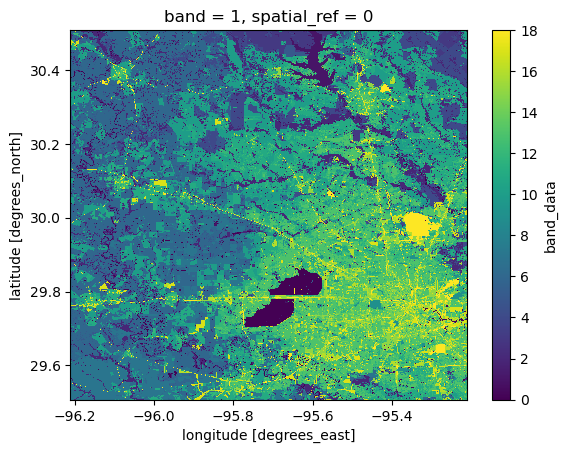

In [34]:
iclus_reprojected.isel(band=0).plot.imshow()
iclus_reprojected.to_netcdf(f"{workspace}/data/iclus/iclus_2020_SSP2_RCP45_reprojected.nc")